# Answer Your Own Question

While it's obviously important to be able to answer a question that is posed to you, a big part of data science is knowing what questions to ask. To give you practice doing this, the last part of this lab is deliberately open-ended. 

**Task:** Come up with your own question about the MovieLens data set and answer it.

You will need to add Markdown and Code cells below to (1) state the question you are trying to answer, (2) write code to answer the question, and (3) explain your findings. You will be graded on:
- how interesting your question is [5 points]
- the correctness of your analysis [10 points]
- the clarity of the presentation [5 points]

If you go above and beyond, you can even earn extra credit.

**Some Tips:**

- In the past, students have found the `Occupation` and `Zip-Code` columns in the users table to be a rich source of questions.
- Your question does not necessarily have to pertain to all movies. Feel free to analyze a specific movie or a specific set of movies, like you did in Question 2 of this lab.

# Who rates what movies?

One would naturally assume older movies have an audience of older people, and vise versa. However, data could be biased if the population of users rating each movie was correlated with the movie's release date. Does this dataset face that issue? To answer this question, find the average age of users for older vs newer movies. In order to eliminate outliers, use only films that have a high number of ratings, say at least 100.

In [1]:
import pandas as pd

columns1 = "UserID::MovieID::Rating::Timestamp".split("::")
columns2 = "UserID::Gender::Age::Occupation::Zip-Code".split("::")
columns3 = "MovieID::Title::Genres".split("::")
ratings = pd.read_table('/data/movielens/ratings.dat', sep='::', 
                        header=None, names=columns1, engine='python')
users = pd.read_table('/data/movielens/users.dat', sep='::', 
                        header=None, names=columns2, engine='python')
movies = pd.read_table('/data/movielens/movies.dat', sep='::', 
                        header=None, names=columns3, engine='python')

In [2]:
merge1 = users.merge(ratings, how='left', on=["UserID"])
data_merged = merge1.merge(movies, how='right', on=["MovieID"])

In [3]:
counts = data_merged.groupby("Title")["MovieID"].count().reset_index(name="Count")
counts.head()

,Title,Count
0,"$1,000,000 Duck (1971)",37
1,'Night Mother (1986),70
2,'Til There Was You (1997),52
3,"'burbs, The (1989)",303
4,...And Justice for All (1979),199


In [4]:
data_merged = data_merged.merge(counts, how='right', on=["Title"])
data_clean = data_merged[data_merged["Count"] >= 100]
data_clean["Year"] = data_clean["Title"].str[-5:-1]
data_clean["Year"] = data_clean["Year"].astype(int)
data_clean = data_clean.drop(["Occupation", "Zip-Code"], 1)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
data_clean = data_clean.sort(columns="Year", axis=0)
data_clean.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,UserID,Gender,Age,MovieID,Rating,Timestamp,Title,Genres,Count,Year
819670,6036.0,F,25.0,1348,4.0,956710766.0,"Nosferatu (Nosferatu, eine Symphonie des Graue...",Horror,238,1922
819518,2065.0,M,25.0,1348,4.0,974659677.0,"Nosferatu (Nosferatu, eine Symphonie des Graue...",Horror,238,1922
819517,2056.0,M,25.0,1348,4.0,974660416.0,"Nosferatu (Nosferatu, eine Symphonie des Graue...",Horror,238,1922
819516,2038.0,F,45.0,1348,4.0,974673140.0,"Nosferatu (Nosferatu, eine Symphonie des Graue...",Horror,238,1922
819515,1969.0,F,25.0,1348,2.0,974693428.0,"Nosferatu (Nosferatu, eine Symphonie des Graue...",Horror,238,1922


In [6]:
%matplotlib inline

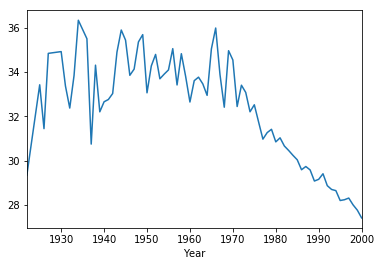

In [7]:
data_clean.groupby("Year")["Age"].mean().plot()

The plot of average user age vs. release year of movies shows no pattern for movies released from 1930 to about 1970. However, there is a steep decline from 1970 to 2000 which indicates movies released during this period show a correlation between user age and movie release, with younger users rating newer movies. 

Since a movie requires input from people of all ages to receive a truly accurate rating, I can conclude that movies in this data set from 1970 to 2000 show some evidence of bias in age for older vs newer movies and that the ratings pertaining to these movies may be inaccurate. However, our findings show no concrete evidence of rating bias based on user age.

### Grader's Comments

- 
- 

[This question is worth 20 points.]

In [8]:
# This cell should only be modified only by a grader.
scores = [0]